In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#initial condition
nx = 81
L = 4.0
dx = L/(nx-1)
u_max = 1.0
rho_max = 10.0
sigma = 1.0
dt = sigma*dx/u_max
x = numpy.linspace(0.0, L, nx)

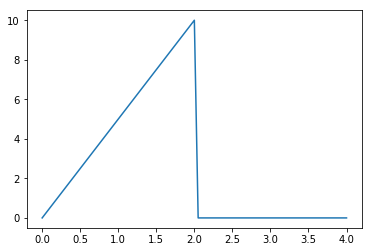

In [3]:
def ic(x,xl,rho_max):
    rho0 = numpy.zeros(nx)
    mask = numpy.where((x>=0.0)&(x<=xl))
    rho0[mask] = rho_max * x[mask]/xl
    return rho0
rho0 = ic(x,2,rho_max)
pyplot.plot(x,rho0)

In [4]:
def flux(rho, u_max, rho_max):
    F = rho * velocity(u_max, rho_max,rho)
    return F

def velocity(u_max, rho_max, rho):
    u = u_max * (1 - rho / rho_max)
    return u

def ftbs(rho0, dt, dx, u_max, rho_max, nt):
    rho = rho0.copy()
    rho_hist = [rho.copy()]
    for n in range(nt):
        rho[1:] = rho[1:] - dt/dx *(flux(rho[1:], u_max, rho_max) - flux(rho[:-1],u_max, rho_max))
        rho_hist.append(rho)
    return rho_hist

In [5]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.title('Time step: {}'.format(n))
    pyplot.xlabel('Road')
    pyplot.ylabel('Traffic density')
    pyplot.plot(x,rho_hist[n])
    pyplot.xlim(x[0],x[-1])
    pyplot.ylim(-0.5,11.0)
    pyplot.show

In [6]:
rho_hist = ftbs(rho0, dt, dx, u_max, rho_max, nt=30)

In [7]:
import ipywidgets

In [8]:
def interactive_plot(x,rho_hist):
    nt = len(rho_hist)-1
    nt_slider = ipywidgets.IntSlider(value = 0, min=0, max = nt, step=1, description='Time step')
    w = ipywidgets.interactive(plot,n=nt_slider,x=ipywidgets.fixed(x),rho_hist = ipywidgets.fixed(rho_hist))
    return w

In [9]:
interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='Time step', max=30), Output()), _dom_classes=('widget-in…